<a href="https://colab.research.google.com/github/yousef-taheri/Projects/blob/master/ClusteringMetrics/ClusterComparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> The objective of this project is to learn and apply popular clustering methods in unsupervised learning and to interpret the results effectively.

In [ ]:
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import numpy as np
import pandas as pd

# Simulated Data

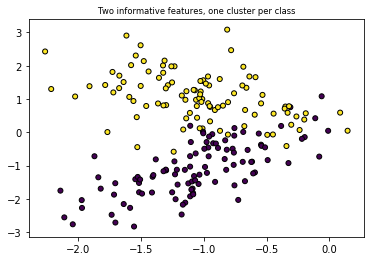

In [ ]:
# First simulated data set
plt.title("Two informative features, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2,n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,s=25, edgecolor='k')

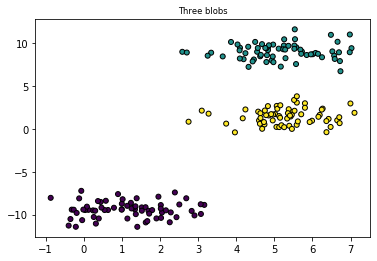

In [ ]:
# Second simulated data set
plt.title("Three blobs", fontsize='small')
X2, Y2 = make_blobs(n_samples=200, n_features=2, centers=3)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2, s=25, edgecolor='k')

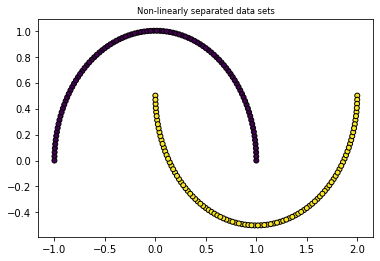

In [ ]:
# Third simulated data set
plt.title("Non-linearly separated data sets", fontsize='small')
X3, Y3 = make_moons(n_samples=200, shuffle=True, noise=None, random_state=None)
plt.scatter(X3[:, 0], X3[:, 1], marker='o', c=Y3, s=25, edgecolor='k')

In [ ]:
def kmFitPlot(X,nbClust):
  km = KMeans(n_clusters=nbClust, init='k-means++', max_iter=100, n_init=1)
  km.fit(X)
  plt.scatter(X[:, 0], X[:, 1], s=10, c=km.labels_)


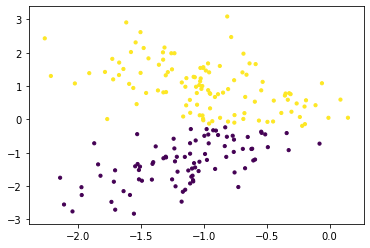

In [ ]:
kmFitPlot(X1,2)

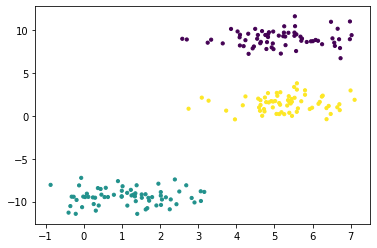

In [ ]:
kmFitPlot(X2,3)

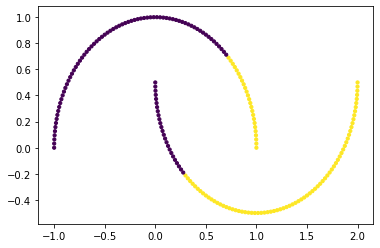

In [ ]:
kmFitPlot(X3,2)

In [ ]:
def AgglomeratFitPlot(X,nbClust):
  for i,linkage in enumerate(('ward', 'average', 'complete')):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=nbClust)
    clustering.fit(X)
    plt.subplot(1,3,i+1)
    plt.title(linkage)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=clustering.labels_)

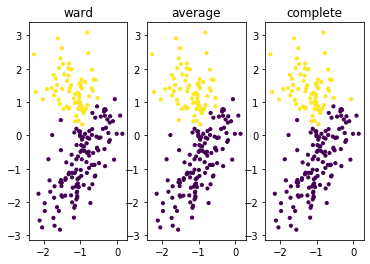

In [ ]:
AgglomeratFitPlot(X1,2)

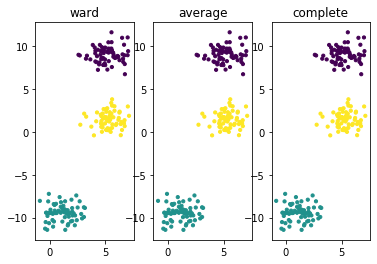

In [ ]:
AgglomeratFitPlot(X2,3)

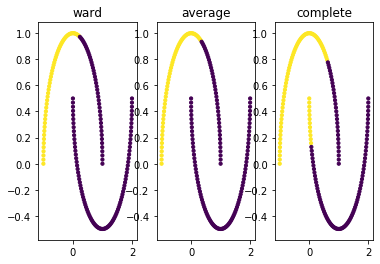

In [ ]:
AgglomeratFitPlot(X3,2)

In [ ]:
def spectralFitPlot(X,bnClust):
  spectral = cluster.SpectralClustering(n_clusters=2, eigen_solver='arpack',affinity="nearest_neighbors")
  spectral.fit(X)
  plt.scatter(X[:, 0], X[:, 1], s=10, c=spectral.labels_)

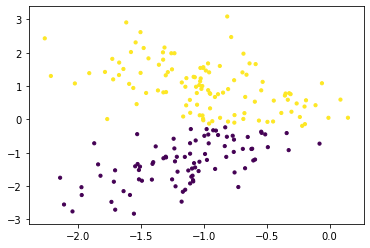

In [ ]:
spectralFitPlot(X1,2)

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


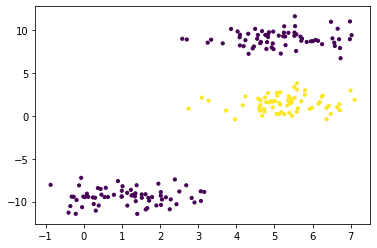

In [ ]:
spectralFitPlot(X2,3)

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


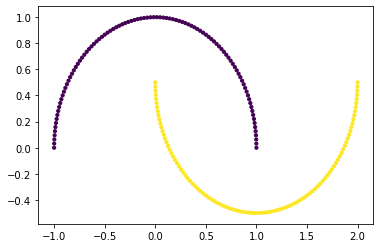

In [ ]:
spectralFitPlot(X3,2)

In [ ]:
def clusterFunc(datalist,datasetName,metric,labels):

  metricF=[metrics.homogeneity_score,
         metrics.completeness_score,
         metrics.v_measure_score,
         metrics.adjusted_rand_score,
         metrics.silhouette_score]
  ind=[i*(metric in f.__name__) for i,f in enumerate(metricF)]
  F=metricF[sum(ind)]
  is_silhouette=metric =='silhouette'
  l=[]
  for x,y in zip(datalist,labels):
    #print(x)
    nClust=len(np.unique(y))

    km = KMeans(n_clusters=nClust, init='k-means++', max_iter=100, n_init=1)
    km.fit(x)

    spectral = cluster.SpectralClustering(n_clusters=nClust, eigen_solver='arpack',affinity="nearest_neighbors")
    spectral.fit(x)
    if is_silhouette:
      tup=(F(x,km.labels_),F(x,spectral.labels_))
    else:
      tup=(F(km.labels_,y),F(spectral.labels_,y))

    for linkage in ('ward', 'average', 'complete'):

      clustering = AgglomerativeClustering(linkage=linkage, n_clusters=nClust)
      clustering.fit(x)

      if is_silhouette:
        tup=tup+(F(x,clustering.labels_),)
      else:
        tup=tup+(F(clustering.labels_,y),)
    l.append(tup)

  colnames=['k-means','spectral','hirarchy-ward','hirarchy-average','hirarchy-complete']
  print("Results of "+metric+" score")
  return pd.DataFrame(l,columns=colnames,index=datasetName)


In [ ]:
clusterFunc([X1,X2,X3],['X1','X2','X3'],'homogeneity',[Y1,Y2,Y3])

Results of homogeneity score


/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


,k-means,spectral,hirarchy-ward,hirarchy-average,hirarchy-complete
X1,0.580249,0.580249,0.546764,0.565687,0.505868
X2,1.000000,1.000000,1.000000,1.000000,1.000000
X3,0.188722,1.000000,0.428297,0.456339,0.286002


In [ ]:
clusterFunc([X1,X2,X3],['X1','X2','X3'],'completeness',[Y1,Y2,Y3])

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


,k-means,spectral,hirarchy-ward,hirarchy-average,hirarchy-complete
X1,0.574248,0.574248,0.513150,0.535606,0.476907
X2,1.000000,1.000000,1.000000,1.000000,1.000000
X3,1.000000,0.188722,0.369267,0.404917,0.280010


In [ ]:
clusterFunc([X1,X2,X3],['X1','X2','X3'],'v_measure',[Y1,Y2,Y3])

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


,k-means,spectral,hirarchy-ward,hirarchy-average,hirarchy-complete
X1,0.577233,0.577233,0.529424,0.550235,0.490961
X2,1.000000,1.000000,1.000000,1.000000,1.000000
X3,1.000000,0.188722,0.396598,0.429093,0.282974


In [ ]:
clusterFunc([X1,X2,X3],['X1','X2','X3'],'adjusted_rand',[Y1,Y2,Y3])

Results of adjusted_rand score


/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


,k-means,spectral,hirarchy-ward,hirarchy-average,hirarchy-complete
X1,0.654388,0.654388,0.516169,0.545479,0.501789
X2,1.000000,1.000000,1.000000,1.000000,1.000000
X3,1.000000,0.246212,0.322123,0.369413,0.344903


In [ ]:
clusterFunc([X1,X2,X3],['X1','X2','X3'],'silhouette',[Y1,Y2,Y3])

Results of silhouette score


/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


,k-means,spectral,hirarchy-ward,hirarchy-average,hirarchy-complete
X1,0.527773,0.527773,0.468794,0.475675,0.472982
X2,0.803643,0.803643,0.803643,0.803643,0.803643
X3,0.489412,0.328316,0.439999,0.443658,0.476567


In [ ]:
#Homogeneity
metrics.homogeneity_score()
#Completeness
metrics.completeness_score()
#V-measure
metrics.v_measure_score()
#Adjusted Rand-Index
metrics.adjusted_rand_score()
#Silhouette Coefficient
metrics.silhouette_score()

#Real world dataset

In [ ]:
#https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data
url="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
breast_data=pd.read_csv(url,header=None)

In [ ]:
breast_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
breast_cancer_X=breast_data.drop([0,1],axis=1)
breast_cancer_Y=breast_data[1]

In [ ]:
breast_data.isnull().sum()
print("no missing values")

In [ ]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls'
mice_data = pd.read_excel(url,'Hoja1')

In [ ]:
mice_data.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,...,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,...,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,...,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,...,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,...,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.48

In [ ]:
mice_data_X=mice_data.drop(['MouseID','Genotype','Treatment','Behavior','class'],axis=1)
mice_data_Y=mice_data['class']

In [ ]:
mice_data_X.isnull().sum()
print("contains missing values")

contains missing values


In [ ]:
#fill missing values
mice_data_X=mice_data_X.fillna(value=mice_data_X.mean(axis=0).to_dict())

In [ ]:
clusterFunc([breast_cancer_X,mice_data_X],['breast Cancer','mice'],'homogeneity',[breast_cancer_Y,mice_data_Y])

Results of homogeneity score


,k-means,spectral,hirarchy-ward,hirarchy-average,hirarchy-complete
breast Cancer,0.516809,0.407686,0.407601,0.235139,0.235139
mice,0.240401,0.488638,0.261355,0.233257,0.205367
